## Weight Initialization - What not to do
Viz Tool - https://www.deeplearning.ai/ai-notes/initialization/index.html

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from mlxtend.plotting import plot_decision_regions

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer

2025-01-31 23:54:19.971711: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738347860.027383   99396 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738347860.042009   99396 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-31 23:54:20.122970: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
X, y = make_moons(n_samples=100, noise=0.2)

X.shape, y.shape

((100, 2), (100,))

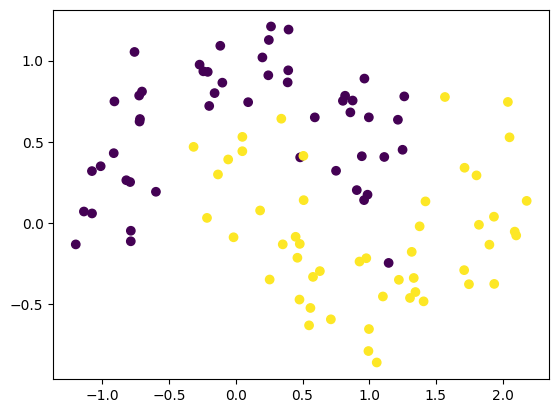

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

# A. Zero Initialization
All weights and biases are set to 0

### Using ReLU 
- Model will not train at all.
- This is gradients will become 0 due to Z = W<sub>1</sub>X<sub>1</sub>+W<sub>2</sub>X<sub>2</sub>+b = 0
- As a result, no updates will take place
- Dying ReLU problem - See Dying ReLU notes

In [29]:
model = Sequential([
    InputLayer(shape=(2, )),
    Dense(2, activation="relu"),
    Dense(1, activation="sigmoid")
])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [30]:
initial_weights = model.get_weights()
initial_weights

[array([[-0.46103078, -0.79074216],
        [ 0.43808317,  0.12385345]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-1.1825202],
        [-0.7395959]], dtype=float32),
 array([0.], dtype=float32)]

In [31]:
# Setting weights to 0
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

model.set_weights(initial_weights)
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [36]:
model.compile(loss="binary_crossentropy", optimizer="adam")

history = model.fit(X, y, epochs=100, verbose=0)

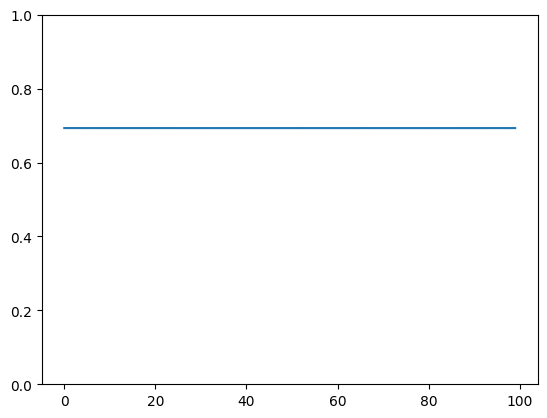

In [37]:
plt.plot(history.history["loss"])
plt.ylim(0, 1)
plt.show()

In [39]:
# Weights after training
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.01200754], dtype=float32)]

### Inference
- As we can see the loss stayed constant and the weights stayed 0
- This means that no training took place at all

## Using tanh activation
- Same thing as ReLU
- tanh(Z) = 0 due to Z = 0

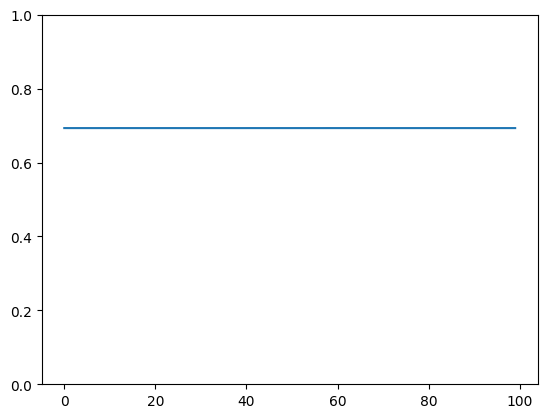

In [44]:
model = Sequential([
    InputLayer(shape=(2, )),
    Dense(2, activation="tanh"),
    Dense(1, activation="sigmoid")
])

initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

model.set_weights(initial_weights)

model.compile(loss="binary_crossentropy", optimizer="adam")
history = model.fit(X, y, epochs=100, verbose=0)

plt.plot(history.history["loss"])
plt.ylim(0, 1)
plt.show()

In [45]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([-0.00345996], dtype=float32)]

### Inference
- Same as ReLU

## Using Sigmoid
- Training will take place but the model will always behave like a linear model
- See Notes

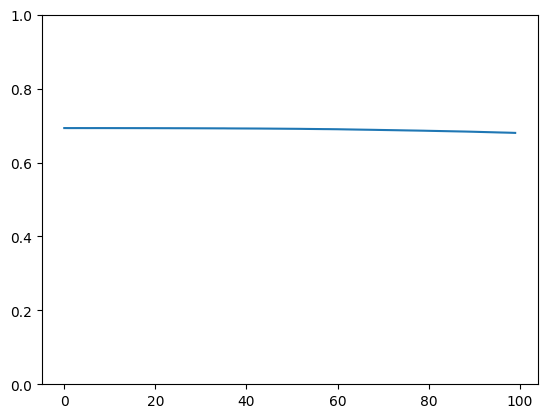

In [53]:
model = Sequential([
    InputLayer(shape=(2, )),
    Dense(2, activation="sigmoid"),
    Dense(1, activation="sigmoid")
])

initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

model.set_weights(initial_weights)

model.compile(loss="binary_crossentropy", optimizer="adam")
history = model.fit(X, y, epochs=100, verbose=0)

plt.plot(history.history["loss"])
plt.ylim(0, 1)
plt.show()

In [54]:
model.get_weights()

[array([[-0.56071085, -0.56071085],
        [ 0.60153216,  0.60153216]], dtype=float32),
 array([-0.03769882, -0.03769882], dtype=float32),
 array([[-0.12569535],
        [-0.12569535]], dtype=float32),
 array([0.02620937], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 6s 570us/step


<Axes: >

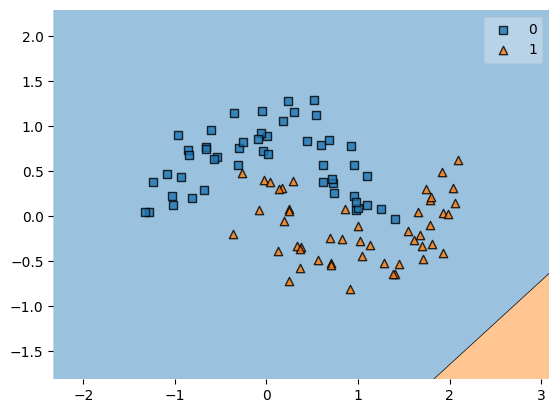

In [55]:
plot_decision_regions(X, y, model)

### Inference

- The loss decreases slightly if we see the curve carefully
- The weights also change and dont stay 0
- But the model always behaves as a linear model no matter the number of nodes or layers

# B. Constant Weights
All weights and biases are initialized to the same constant value\
Model will always behave like a linear model no matter the number of nodes or layers- See Notes

In [56]:
model = Sequential([
    InputLayer(shape=(2, )),
    Dense(10, activation="relu"),      # tanh and sigmoid will give the same results
    Dense(1, activation="sigmoid")
])

initial_weights[0] = np.ones(model.get_weights()[0].shape) * 0.1
initial_weights[1] = np.ones(model.get_weights()[1].shape) * 0.1
initial_weights[2] = np.ones(model.get_weights()[2].shape) * 0.1
initial_weights[3] = np.ones(model.get_weights()[3].shape) * 0.1

model.set_weights(initial_weights)

In [57]:
model.get_weights()

[array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32),
 array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], dtype=float32),
 array([[0.1],
        [0.1],
        [0.1],
        [0.1],
        [0.1],
        [0.1],
        [0.1],
        [0.1],
        [0.1],
        [0.1]], dtype=float32),
 array([0.1], dtype=float32)]

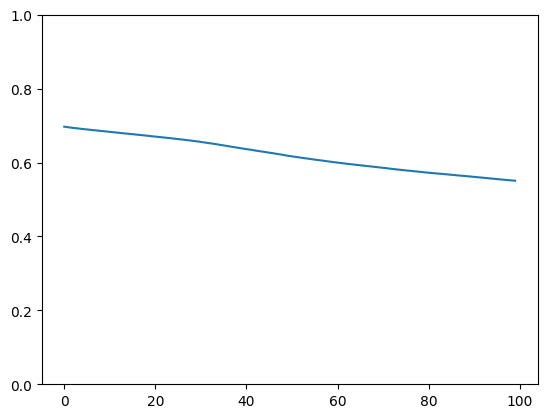

In [58]:
model.compile(loss="binary_crossentropy", optimizer="adam")
history = model.fit(X, y, epochs=100, verbose=0)

plt.plot(history.history["loss"])
plt.ylim(0, 1)
plt.show()

In [59]:
model.get_weights()

[array([[ 0.25626478,  0.25626478,  0.25626478,  0.25626478,  0.25626478,
          0.25626478,  0.25626478,  0.25626478,  0.25626478,  0.25626478],
        [-0.26168928, -0.26168928, -0.26168928, -0.26168928, -0.26168928,
         -0.26168928, -0.26168928, -0.26168928, -0.26168928, -0.26168928]],
       dtype=float32),
 array([0.13629314, 0.13629314, 0.13629314, 0.13629314, 0.13629314,
        0.13629314, 0.13629314, 0.13629314, 0.13629314, 0.13629314],
       dtype=float32),
 array([[0.29671183],
        [0.29671183],
        [0.29671183],
        [0.29671183],
        [0.29671183],
        [0.29671183],
        [0.29671183],
        [0.29671183],
        [0.29671183],
        [0.29671183]], dtype=float32),
 array([-0.14958961], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 5s 552us/step


<Axes: >

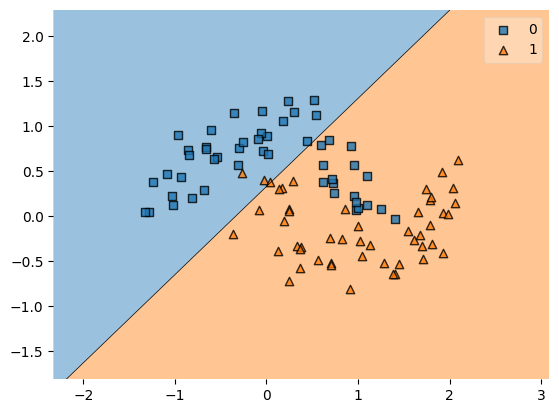

In [60]:
plot_decision_regions(X, y, model)

### Inference
- As we can see the weights coming out from one node (including input nodes) are all equal
- The model will always behave like a linear model no matter the number of nodes or layers

# C. Random Initialization
All weights (and biases) are initialized randomly
- Try the viz tool for this - https://www.deeplearning.ai/ai-notes/initialization/index.html

## Case 1 - Small Random Weights

#### Using tanh and sigmoid
Vanishing Gradient Problem

In [98]:
model = Sequential([
    InputLayer(shape=(2, )),
    Dense(2, activation="tanh"),        # sigmoid will give similar results as well
    Dense(2, activation="tanh"),
    Dense(2, activation="tanh"),
    Dense(1, activation="sigmoid")
])

model.get_weights()

[array([[-1.0001853 , -0.23241282],
        [ 0.5423627 , -1.046535  ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.92499995, -0.64011705],
        [-0.22586203, -0.11572218]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.7100851 ,  0.30889368],
        [ 0.22771275, -1.2146679 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-1.332476 ],
        [ 1.1416537]], dtype=float32),
 array([0.], dtype=float32)]

In [99]:
# Setting small weights 

initial_weights = []
for i in model.get_weights():
    initial_weights.append(np.random.randn(*i.shape) * 0.001)

model.set_weights(initial_weights)
model.get_weights()

[array([[ 0.00079893,  0.00039398],
        [ 0.00075773, -0.00219428]], dtype=float32),
 array([-0.00129961,  0.00110625], dtype=float32),
 array([[ 0.00128567, -0.00120447],
        [-0.00034931, -0.00144233]], dtype=float32),
 array([-0.00012638,  0.00299812], dtype=float32),
 array([[-0.00082115,  0.00156509],
        [-0.00104652,  0.00108426]], dtype=float32),
 array([ 9.0753112e-04, -1.9402614e-06], dtype=float32),
 array([[-0.00053315],
        [ 0.00077504]], dtype=float32),
 array([-0.00093943], dtype=float32)]

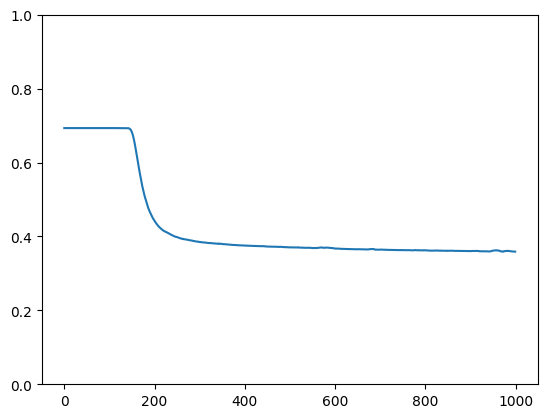

In [100]:
model.compile(loss="binary_crossentropy", optimizer="adam")
history = model.fit(X, y, epochs=1000, verbose=0)

plt.plot(history.history["loss"])
plt.ylim(0, 1)
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 6s 579us/step


<Axes: >

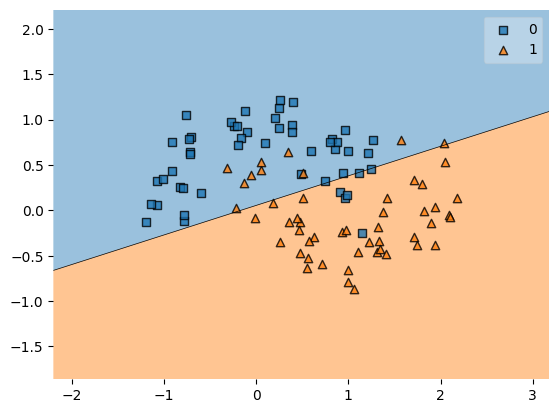

In [101]:
plot_decision_regions(X, y, model)

In [102]:
# weights after training
model.get_weights()

[array([[ 0.26084962,  0.2545055 ],
        [-0.7991234 , -0.7838915 ]], dtype=float32),
 array([-0.10152142, -0.09171705], dtype=float32),
 array([[ 0.61130923, -0.62166786],
        [ 0.600106  , -0.6073525 ]], dtype=float32),
 array([ 0.03095656, -0.02428385], dtype=float32),
 array([[ 0.9222436 ,  0.94000256],
        [-0.9052845 , -0.94541353]], dtype=float32),
 array([0.18257791, 0.15313838], dtype=float32),
 array([[1.6312321],
        [1.5976539]], dtype=float32),
 array([0.29967758], dtype=float32)]

### Inference

- Hmm, that was unexpected. Seems like the model is training, but its behaving like a linear model
- It should have been a vanishing gradient problem but its not happening - maybe i did something wrong
- Lets move on to ReLU for now

#### Using ReLU
Extermely slow convergence

In [112]:
model = Sequential([
    InputLayer(shape=(2, )),
    Dense(2, activation="relu"),    
    Dense(2, activation="relu"),
    Dense(2, activation="relu"),
    Dense(1, activation="sigmoid")
])

initial_weights = []
for i in model.get_weights():
    initial_weights.append(np.random.randn(*i.shape) * 0.005)

model.set_weights(initial_weights)
model.get_weights()

[array([[-0.00735608, -0.00475305],
        [ 0.00353458,  0.00079469]], dtype=float32),
 array([-0.00129084,  0.00179276], dtype=float32),
 array([[ 0.00572734, -0.00252571],
        [-0.00498425, -0.00070829]], dtype=float32),
 array([0.00330898, 0.00246311], dtype=float32),
 array([[-0.00311468,  0.00239189],
        [-0.00138019,  0.00030462]], dtype=float32),
 array([ 0.00142804, -0.00879184], dtype=float32),
 array([[-0.00215509],
        [-0.00260038]], dtype=float32),
 array([-0.00357193], dtype=float32)]

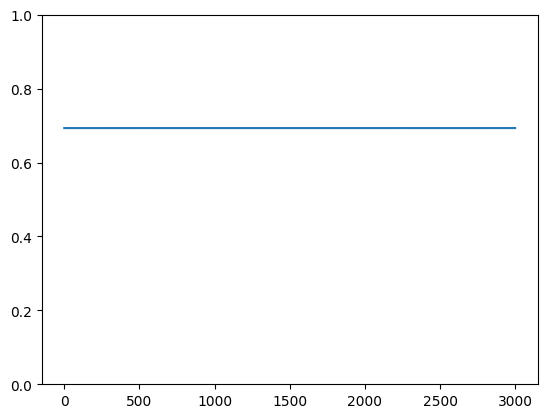

In [113]:
model.compile(loss="binary_crossentropy", optimizer="adam")
history = model.fit(X, y, epochs=3000, verbose=0)

plt.plot(history.history["loss"])
plt.ylim(0, 1)
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 6s 574us/step


<Axes: >

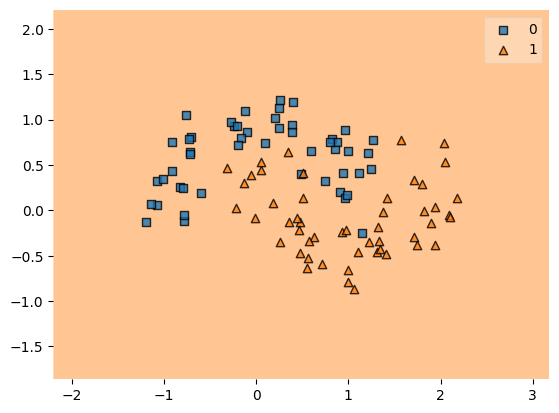

In [114]:
plot_decision_regions(X, y, model)

In [115]:
# weights after training
model.get_weights()

[array([[-0.00732663, -0.00478907],
        [ 0.0034919 ,  0.00085352]], dtype=float32),
 array([-0.00134964,  0.00184597], dtype=float32),
 array([[ 0.00566403, -0.00255414],
        [-0.00504341, -0.0007349 ]], dtype=float32),
 array([0.00491684, 0.00337836], dtype=float32),
 array([[-0.00477436,  0.00239189],
        [-0.00285445,  0.00030462]], dtype=float32),
 array([-0.00248188, -0.00879184], dtype=float32),
 array([[ 0.00220745],
        [-0.00260038]], dtype=float32),
 array([0.02257182], dtype=float32)]

### Inference
- As we can see the model took extremly long to even start reducing its loss (okay here we can't see but it will given very large number of epochs)
- The weights also barely changed due to very small gradients
- Thus extremely slow convergence

## Case 2 - Large Random Weights

#### Using tanh and sigmoid
Vanishing Gradient Problem

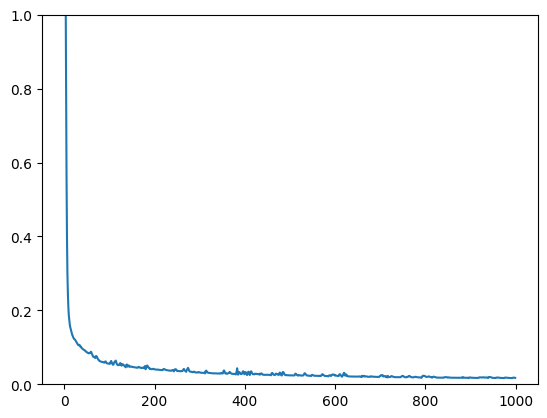

In [118]:
model = Sequential([
    InputLayer(shape=(2, )),
    Dense(30, activation="tanh"),        # sigmoid will give similar results as well
    Dense(30, activation="tanh"),
    Dense(30, activation="tanh"),
    Dense(1, activation="sigmoid")
])

initial_weights = []
for i in model.get_weights():
    initial_weights.append(np.random.randn(*i.shape) * 1)

model.set_weights(initial_weights)
model.compile(loss="binary_crossentropy", optimizer="adam")
history = model.fit(X, y, epochs=1000, verbose=0)

plt.plot(history.history["loss"])
plt.ylim(0, 1)
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 6s 616us/step


<Axes: >

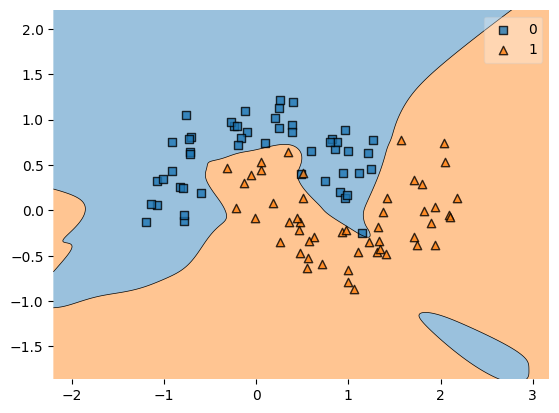

In [119]:
plot_decision_regions(X, y, model)

### Inference
Welp no idea here also ... doesn't seem like VGP to me but CampusX said \
It does seem like its overfitting a lot, maybe exploding gradient ?? no idea

#### Using ReLU
Exploding Gradient

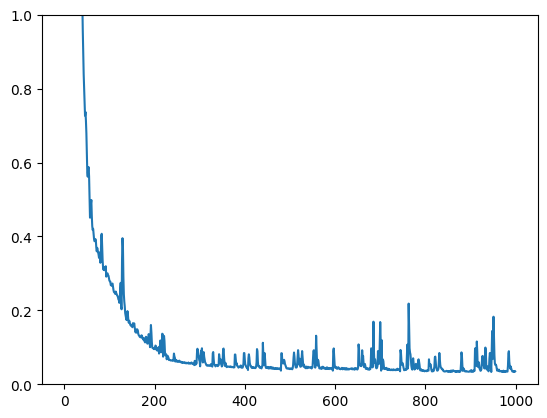

In [120]:
model = Sequential([
    InputLayer(shape=(2, )),
    Dense(30, activation="relu"),        # sigmoid will give similar results as well
    Dense(30, activation="relu"),
    Dense(30, activation="relu"),
    Dense(1, activation="sigmoid")
])

initial_weights = []
for i in model.get_weights():
    initial_weights.append(np.random.randn(*i.shape) * 1)

model.set_weights(initial_weights)
model.compile(loss="binary_crossentropy", optimizer="adam")
history = model.fit(X, y, epochs=1000, verbose=0)

plt.plot(history.history["loss"])
plt.ylim(0, 1)
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 6s 650us/step


<Axes: >

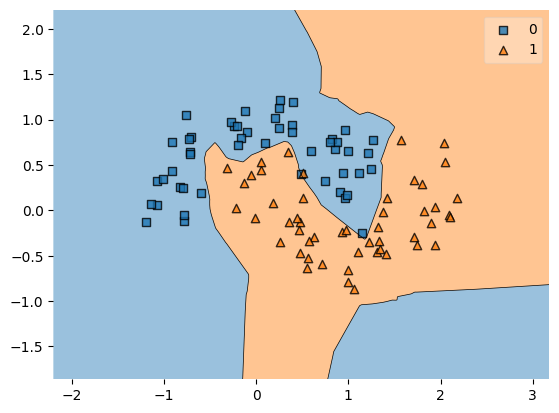

In [121]:
plot_decision_regions(X, y, model)

### Inference
- Okay here we can see exploding gradient and unstable training from the loss curve
- The decision boundary plot ?? no idea what its telling but seems like its overfitting a hell lot